# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] # YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"]# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max'] # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE
        city_country = city_weather["sys"]['country'] # YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | tanjung pandan
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | heinola
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | saint-paul
Processing Record 13 of Set 1 | kaga bandoro
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | brokopondo
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | bahia de kino
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | turkmenbasy
Processing Record 39 of Set 4 | usinsk
Processing Record 40 of Set 4 | ust'-kut
Processing Record 41 of Set 4 | ataq
Processing Record 42 of Set 4 | sealy
Processing Record 43 of Set 4 | gisborne
Processing Record 44 of Set 4 | harstad
Processing Record 45 of Set 4 | punta arenas
Processing Record 46 of Set 4 | ola
Processing Record 47 of Set 4 | kapuskasing
Processing Record 48 of Set 4 | fale old settlement
Processing Record 49 of Set 4 | shahpur
Processing Record 0 of Set 5 | saidpur
Processing Record 1 of Set 5 | kuanda
Processing Record 2 of Set 5 | mili
Processing Record 3 of Set 5 | baiao
Processing Record 4 of Set 5 | ta`u
Processing Record 5 of Set 5 | grand falls-windsor
Processing Record 6 of Set 5 | bure
Processing Record 7 of Set 5 | arkhangel'sk
Processing Record 8 of Set 5 | ballymena
Processing Record 9 of Set 5 | papatowai
Processing Record 10 of Set 5 | gizo
Processing Record 11 of Set 5 | mount pearl
Processing Record 12 of

Processing Record 28 of Set 8 | bomi
Processing Record 29 of Set 8 | howrah
Processing Record 30 of Set 8 | nosy varika
Processing Record 31 of Set 8 | cabo san lucas
Processing Record 32 of Set 8 | camalu
Processing Record 33 of Set 8 | chos malal
Processing Record 34 of Set 8 | dzuunharaa
Processing Record 35 of Set 8 | buka
Processing Record 36 of Set 8 | kilimatinde
Processing Record 37 of Set 8 | yokadouma
Processing Record 38 of Set 8 | mantenopolis
Processing Record 39 of Set 8 | xilin hot
Processing Record 40 of Set 8 | aripuana
Processing Record 41 of Set 8 | perth
Processing Record 42 of Set 8 | kletskaya
Processing Record 43 of Set 8 | ketchikan
Processing Record 44 of Set 8 | namdrik
Processing Record 45 of Set 8 | knyaze-volkonskoye
Processing Record 46 of Set 8 | celestun
Processing Record 47 of Set 8 | keflavik
Processing Record 48 of Set 8 | al hufuf
Processing Record 49 of Set 8 | daru
Processing Record 0 of Set 9 | belyy yar
Processing Record 1 of Set 9 | peniche
Proc

Processing Record 17 of Set 12 | bugana
Processing Record 18 of Set 12 | ha'il
Processing Record 19 of Set 12 | jacmel
Processing Record 20 of Set 12 | borujen
Processing Record 21 of Set 12 | la ronge
Processing Record 22 of Set 12 | haradok
Processing Record 23 of Set 12 | mossel bay
Processing Record 24 of Set 12 | malabar
Processing Record 25 of Set 12 | korla
Processing Record 26 of Set 12 | minas
Processing Record 27 of Set 12 | banda aceh
Processing Record 28 of Set 12 | yangor
City not found. Skipping...
Processing Record 29 of Set 12 | qurayyat
Processing Record 30 of Set 12 | khabary
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.400,168.3500,7.83,86,100,1.17,NZ,1687637902
1,adamstown,-25.066,-130.1015,20.49,57,100,4.15,PN,1687637902
2,kodiak,57.790,-152.4072,9.73,93,100,5.66,US,1687637698
3,margaret river,-33.950,115.0667,10.48,81,100,3.50,AU,1687637903
4,tanjung pandan,-2.750,107.6500,24.28,88,97,2.35,ID,1687637903


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.400,168.3500,7.83,86,100,1.17,NZ,1687637902
1,adamstown,-25.066,-130.1015,20.49,57,100,4.15,PN,1687637902
2,kodiak,57.790,-152.4072,9.73,93,100,5.66,US,1687637698
3,margaret river,-33.950,115.0667,10.48,81,100,3.50,AU,1687637903
4,tanjung pandan,-2.750,107.6500,24.28,88,97,2.35,ID,1687637903


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

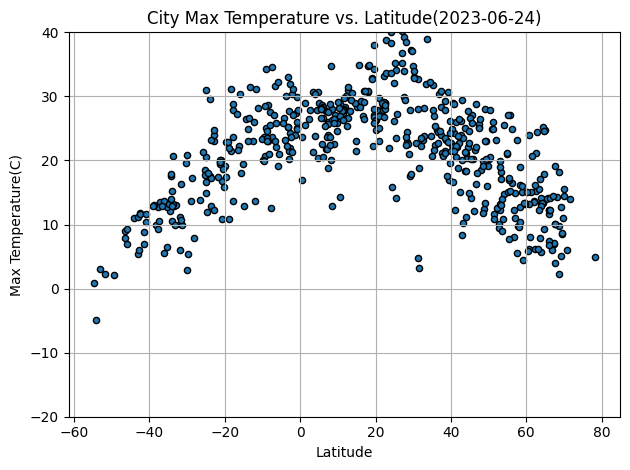

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat",y="Max Temp",grid=True,edgecolors='black')
today = date.today()
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title (f"City Max Temperature vs. Latitude({today})")
plt.ylim(-20,40)
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

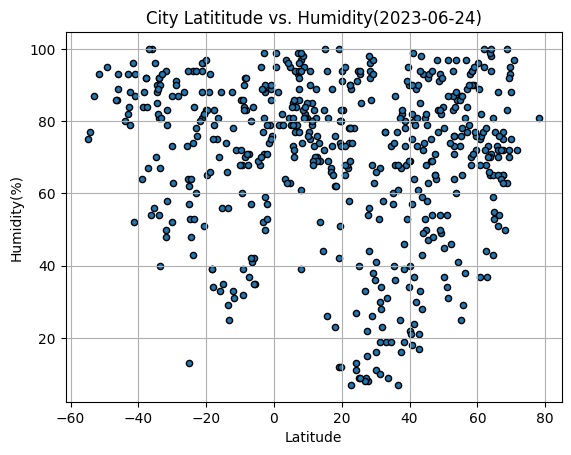

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", grid=True,edgecolors='black')
today = date.today()
# Incorporate the other graph properties
plt.xlabel("Latitude")# YOUR CODE HERE
plt.ylabel("Humidity(%)")
plt.title(f"City Latititude vs. Humidity({today})")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

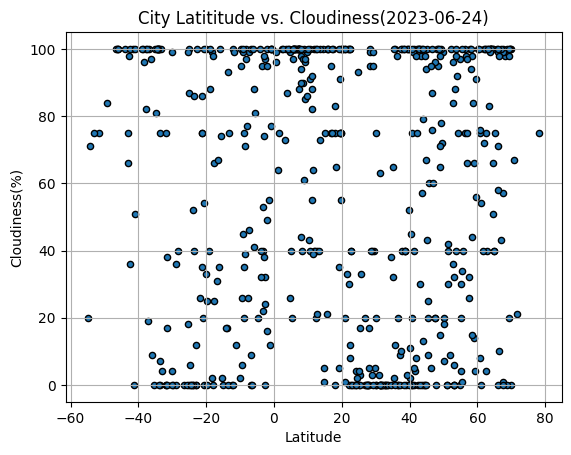

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness", grid=True,edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")# YOUR CODE HERE
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latititude vs. Cloudiness({today})")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

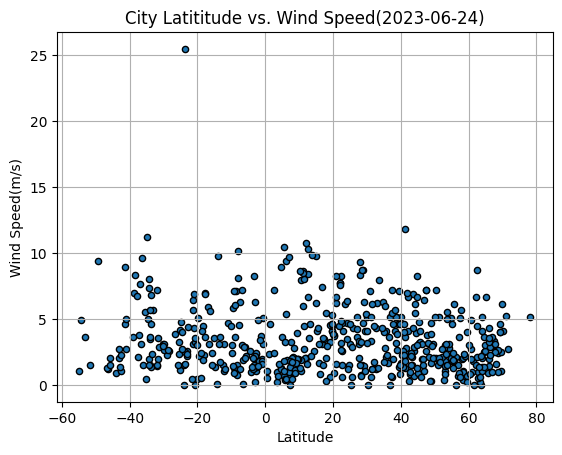

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed", grid=True,edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")# YOUR CODE HERE
plt.ylabel("Wind Speed(m/s)")
plt.title(f"City Latititude vs. Wind Speed({today})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
def lin_function(x,y):
    #get the linear regression equation and plot points
    (slope, intercept, r, p, se) = linregress(x,y)
    regress_value= x * slope + intercept
    line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {r}")
    
    #plot the data
    plt.scatter(x,y, color='blue')
    plt.plot(x, regress_value, color="red")
    plt.annotate(line_eq,(min(x+5),min(y+5)),fontsize= 15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(input("ylabel: "))
    plt.title(input("title: ")+ f' ({today})')
    plt.tight_layout()
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kodiak,57.7900,-152.4072,9.73,93,100,5.66,US,1687637698
5,college,64.8569,-147.8028,24.70,55,40,2.57,US,1687637903
6,yellowknife,62.4560,-114.3525,15.31,44,75,8.75,CA,1687637660
7,heinola,61.2056,26.0381,15.00,82,54,1.83,FI,1687637904
8,thompson,55.7435,-97.8558,27.09,29,40,6.17,CA,1687637904


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.400,168.3500,7.83,86,100,1.17,NZ,1687637902
1,adamstown,-25.066,-130.1015,20.49,57,100,4.15,PN,1687637902
3,margaret river,-33.950,115.0667,10.48,81,100,3.50,AU,1687637903
4,tanjung pandan,-2.750,107.6500,24.28,88,97,2.35,ID,1687637903
9,port-aux-francais,-49.350,70.2167,2.05,95,84,9.43,TF,1687637904


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6801543738245794
ylabel: Temperature (c)
title: Temperature vs. Latitude Northern Hemisphere 


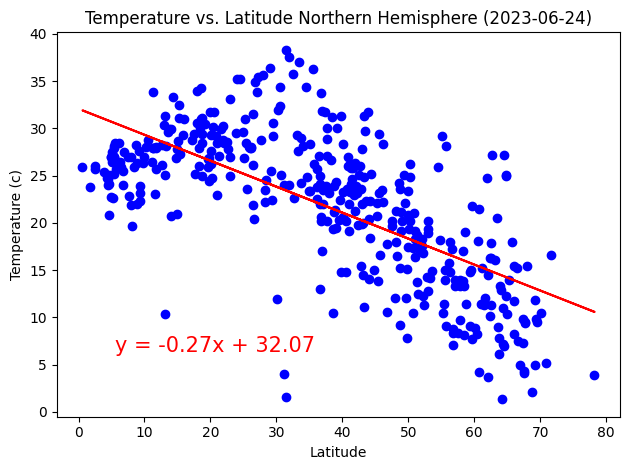

In [70]:
# Linear regression on Northern Hemisphere
lin_function(northern_hemi_df['Lat'], northern_hemi_df["Max Temp"])

The r-value is: 0.8260114464419546
ylabel: Temperature (c)
title: Temperature vs. Latitude Southern Hemisphere


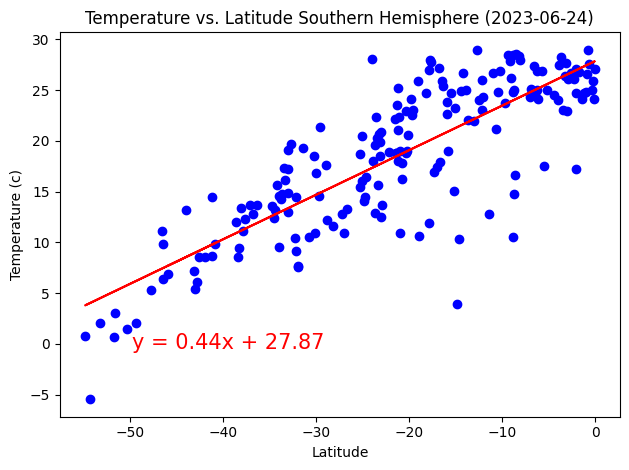

In [76]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
lin_function(southern_hemi_df['Lat'], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** Both charts show a similar pattern where the temperature is colder the further the latitude is from the equator.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03416435005719304
ylabel: Humidity (%)
title: Humidity vs. Latitude Northern Hemisphere


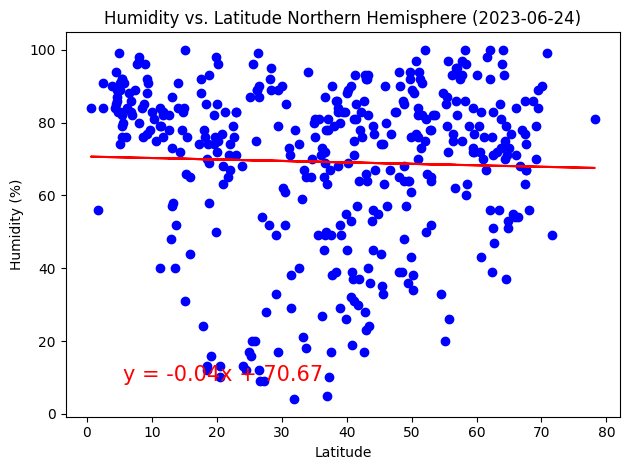

In [73]:
# Northern Hemisphere
# YOUR CODE HERE
lin_function(northern_hemi_df['Lat'], northern_hemi_df["Humidity"])

The r-value is: -0.2093573898232916
ylabel: Humidity (%)
title: Humidity vs. Latitude Southern Hemisphere


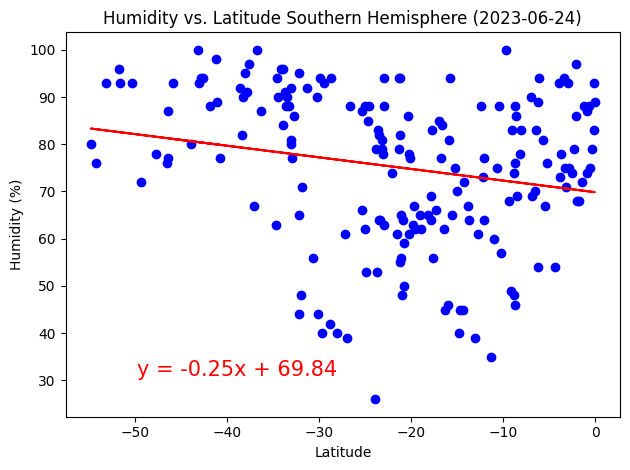

In [77]:
# Southern Hemisphere
# YOUR CODE HERE
lin_function(southern_hemi_df['Lat'], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** There is a difference between the regression value for the northern hemisphere and the southern hemisphere.  While the has a more flat distribution showing that there is little correlation between the humidity and latitude, the southern hemisphere shows that there is more of link to humidity and the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.015589373220967173
ylabel: Cloudiness
title: Cloudiness vs. Latitude Northern Hemisphere


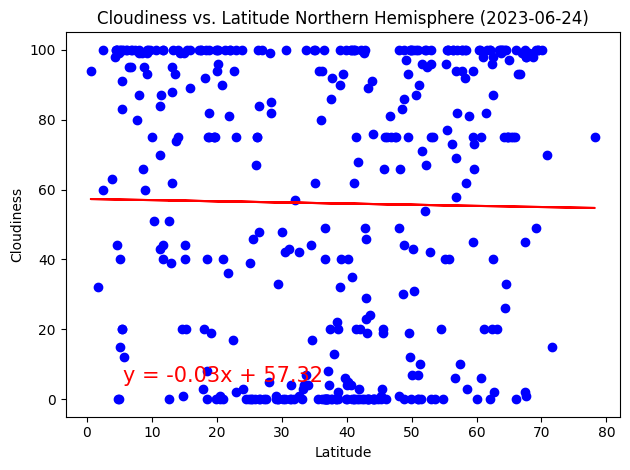

In [78]:
# Northern Hemisphere
# YOUR CODE HERE
lin_function(northern_hemi_df['Lat'], northern_hemi_df["Cloudiness"])

The r-value is: -0.17904960204201156
ylabel: Cloudiness
title: Cloudiness vs. Latitude Southern Hemisphere


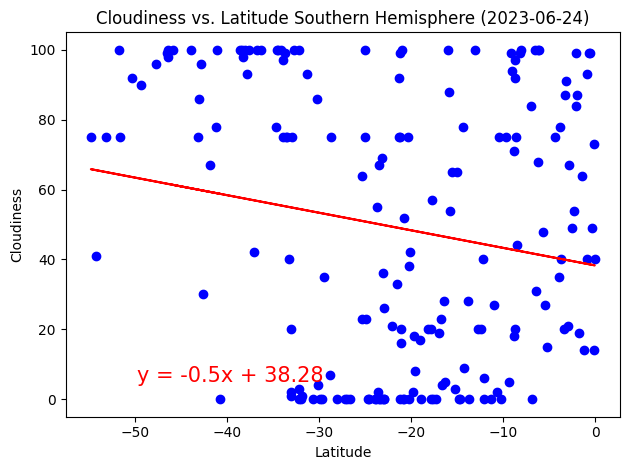

In [80]:
# Southern Hemisphere
# YOUR CODE HERE
lin_function(southern_hemi_df['Lat'], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** The data from the northern hemisphere is quite spreaed out as is shown in the regression line being so flat.  There are a lot of location locations that have iether full cloud coud or no cloud cover at all leading to a slightly negative regression value of -0.012.  The southern hemisphere has a slightly stronger negative correlation with a regression value -0.18. Overall the cloudiness of the cities of the data set is quite spreadout out and does not have much relation with the latitude of the city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.18923723199555084
ylabel: Wind Speed (m/s)
title: Wind Speed vs. Latitude Northern Hemisphere


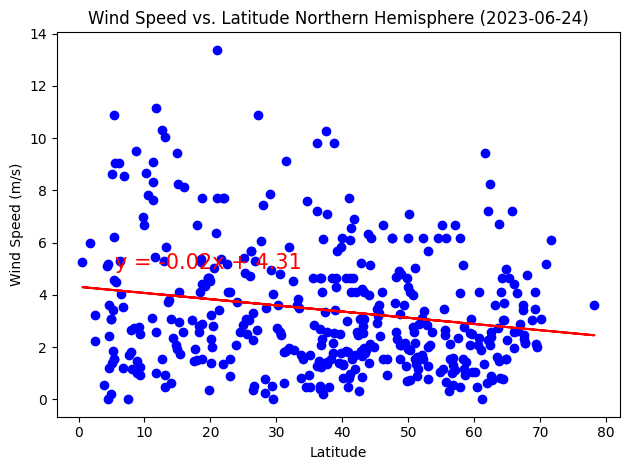

In [81]:
# Northern Hemisphere
# YOUR CODE HERE
lin_function(northern_hemi_df['Lat'], northern_hemi_df["Wind Speed"])

The r-value is: -0.031466721666524165
ylabel: Wind Speed (m/s)
title: Wind Speed vs. Latitude Southern Hemisphere


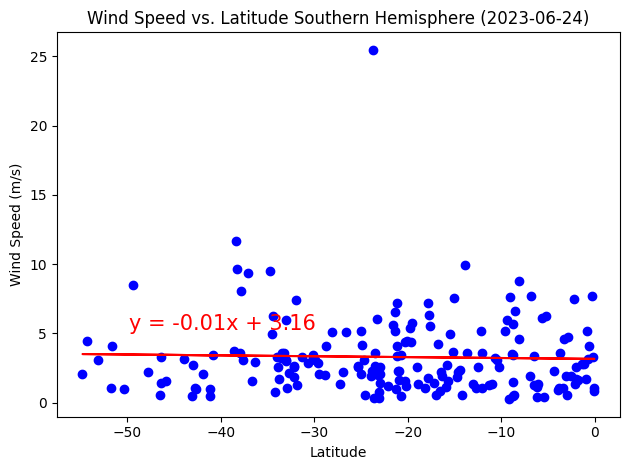

In [82]:
# Southern Hemisphere
# YOUR CODE HERE
lin_function(southern_hemi_df['Lat'], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** There is not a strong argument for their to be a correlation between the wind speed and latitude of the city.  Both have a slightly negative correlation with the northern hemisphere having a -0.189 regression value compared to the southern hemisphere's -0.031.